### Lesson 03
Урок 3. Парсинг данных. Работа с данными в MongoDB

Развернуть у себя на компьютере/виртуальной машине/хостинге MongoDB и реализовать функцию, которая будет добавлять только новые вакансии/продукты в вашу базу.

Написать функцию, которая производит поиск и выводит на экран вакансии с заработной платой больше введённой суммы (необходимо анализировать оба поля зарплаты). Для тех, кто выполнил задание с Росконтролем - напишите запрос для поиска продуктов с рейтингом не ниже введенного или качеством не ниже введенного (то есть цифра вводится одна, а запрос проверяет оба поля)

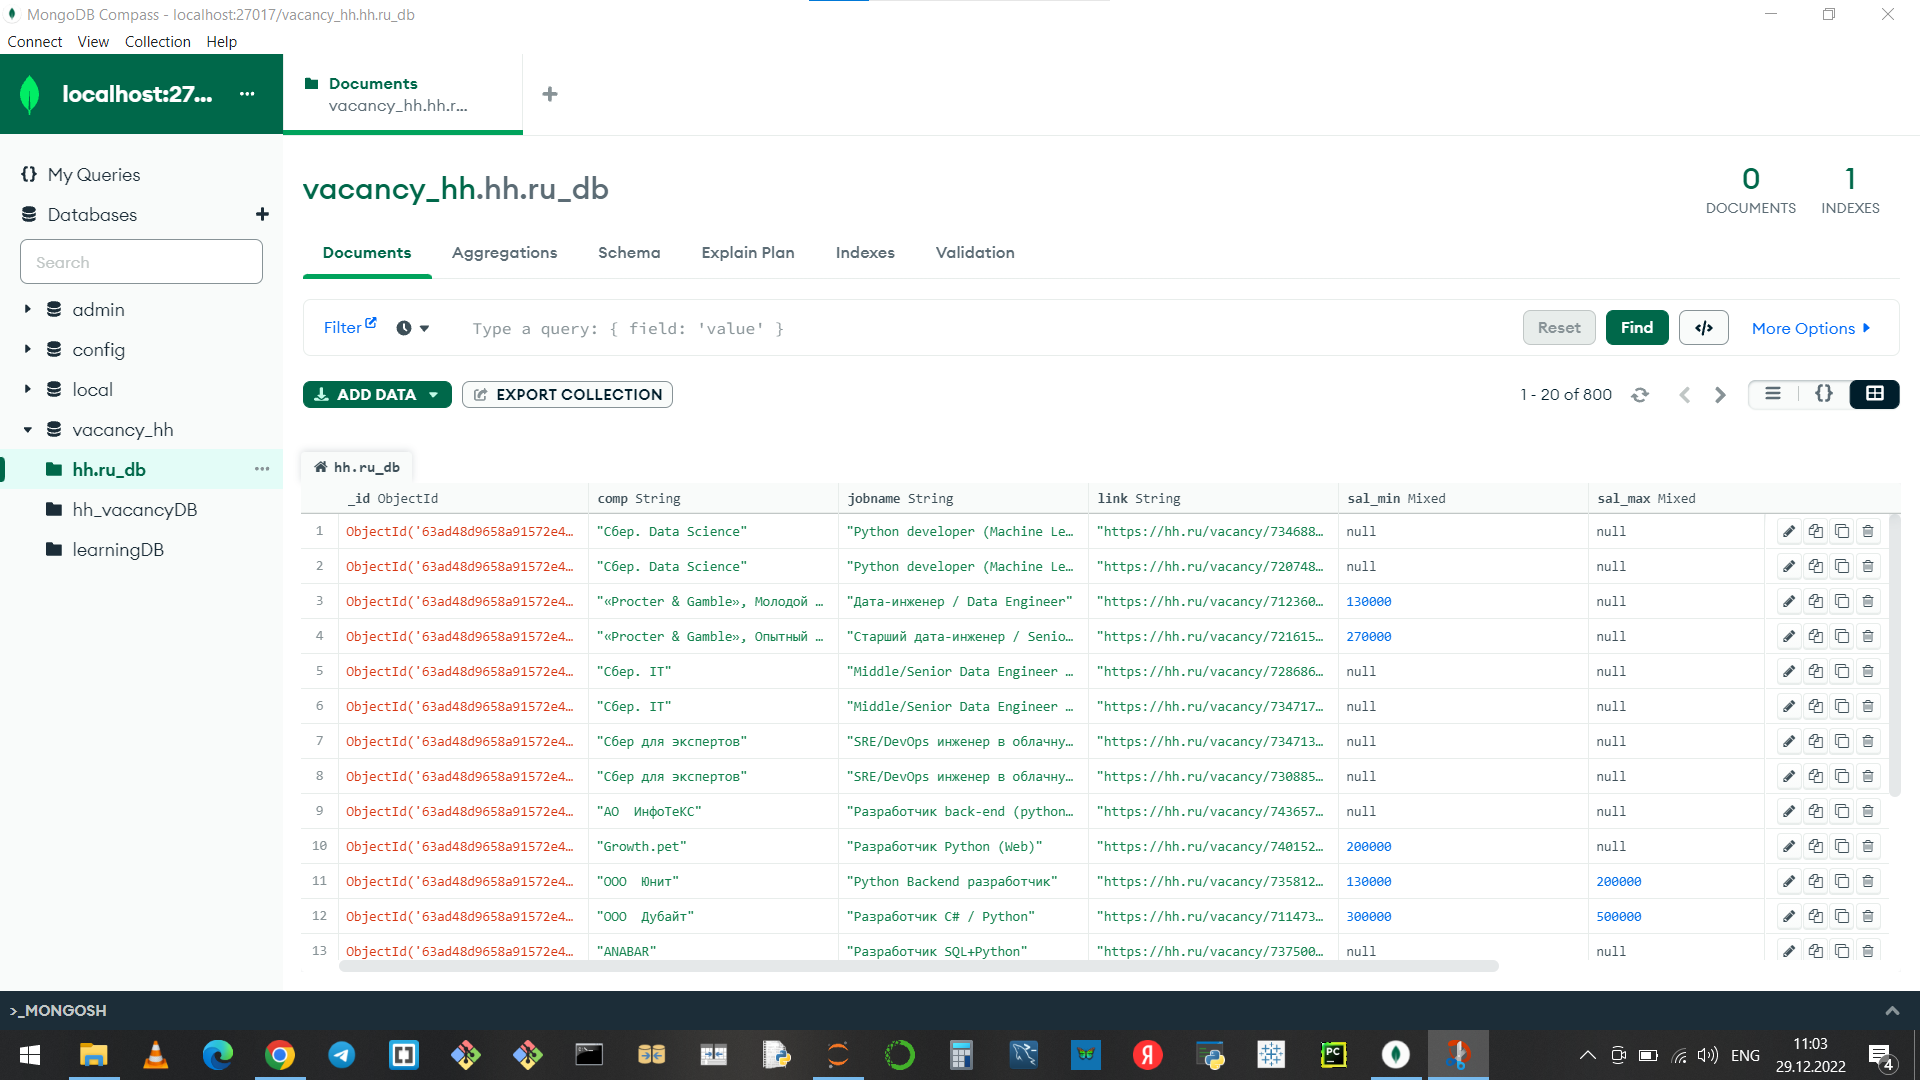

In [1]:
from pprint import pprint
from bs4 import BeautifulSoup as bs
import requests
import time
import re

In [2]:
#Объявляем функцию, которая будет преобразовывать списки, получаемые от lxml|xpath в строки
def group(rows):
    concat = ""
    for row in rows:
        concat = concat + str(row)
        rows = concat
    return rows

In [9]:
#Задаём имя искомой вакансии
name = "python"

#Задаём теоретическое максимально возможное количество страниц
max_pages = 40

#Задаём таймаут для запросов к серверу в секундах
wait = 0

page = 0
url = 'https://hh.ru/search/vacancy?text=' + name + '&page=' + str(page) + '&from=suggest_post&salary=&area=1&ored_clusters=true&enable_snippets=true'

headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}

responce = requests.get(url, headers=headers)
dom = bs(responce.text, 'lxml')

In [10]:
page = 0
#проверка на символы
regex = re.compile('[a-zA-Zа-яА-ЯёЁ.\s]')
#Создаём словарь, в котором ключом будет являться порядковый номер вакансии
jobdict = {}
jobnum = 1

#Проходим по всем страницам
while page < max_pages:
    url = 'https://hh.ru/search/vacancy?text=' + name + '&page=' + str(page) + '&from=suggest_post&salary=&area=1&ored_clusters=true&enable_snippets=true'
    time.sleep(wait)
    #Читаем страницу
    responce = requests.get(url, headers=headers)
    dom = bs(responce.text, 'lxml')
    
    #Кладём в переменную список вакансий со страницы
    joblist = dom.find_all('div', class_='vacancy-serp-item-body__main-info')
    
    #Для каждой вакансии на странице получаем информацию. N - переменная которая передаётся в качестве аргумента xpath (Поэтому с 1, а не с 0)
    
    for text in joblist:
        jobsalary = text.find('span', class_='bloko-header-section-3')
        #jobsalary = dom.find("(//div[@class='vacancy-serp-item-body__main-info'])[" + str(n) + "]//span[@class='bloko-header-section-3']/text()")
        #Проверяем записи в списке jobsalary   
        if not jobsalary:
            curency = None
            sal_min = None
            sal_max = None
        else:
            jobsalary = group(jobsalary)
            if "руб" in jobsalary.lower():
                curency = "рубль РФ"
            elif "usd" in jobsalary.lower():
                curency = "доллар США"
            elif "eur" in jobsalary.lower():
                curency = "Евро"
            elif "kzt" in jobsalary.lower():
                curency = "казахстанский тенге"
            else:
                curency = "other"
            
            if "от" in jobsalary.lower():
                sal_min = int(regex.sub('', jobsalary))
                sal_max = None
            elif "до" in jobsalary.lower():
                sal_max = int(regex.sub('', jobsalary))
                sal_mix = None
            elif "–" in jobsalary.lower():
                clean = regex.sub('', jobsalary)
                sal_min=int(clean[:clean.find("–")])
                sal_max=int(clean[clean.find("–")+1:])
                     
        company = group(text.find('div', class_='vacancy-serp-item__meta-info-company').find('a').contents)
        jobname = group(text.find('h3', class_='bloko-header-section-3').find('span').find('a').contents)
        link = group(text.find('a', class_='serp-item__title', href=True)['href'])
        #company = dom.find("(//div[@class='vacancy-serp-item-body__main-info'])[" + str(n) + "]//div[@class='vacancy-serp-item__meta-info-company']/a/text()")
        #company = group(company)
    
        #jobname = dom.find("(//div[@class='vacancy-serp-item-body__main-info'])[" + str(n) + "]//h3[@class='bloko-header-section-3']/span/a/text()")
        #jobname = group(jobname)
        
        #link = dom.find("(//div[@class='vacancy-serp-item-body__main-info'])[" + str(n) + "]//a[@class='serp-item__title']/@href")
        #link=group(link)
        #Складываем собранную информацию в словарь
        jobdict[jobnum] = {'comp' : company, 'jobname': jobname, 'link' : link, 'sal_min' : sal_min, 'sal_max' : sal_max, 'currency' : curency}
        
        jobnum += 1
       
    
    page += 1
    #Счётчик, показывающий что программа не зависла
    print ("Обработано страниц:", page, "из", max_pages)
print("Сбор данных завершён")

Обработано страниц: 1 из 40
Обработано страниц: 2 из 40
Обработано страниц: 3 из 40
Обработано страниц: 4 из 40
Обработано страниц: 5 из 40
Обработано страниц: 6 из 40
Обработано страниц: 7 из 40
Обработано страниц: 8 из 40
Обработано страниц: 9 из 40
Обработано страниц: 10 из 40
Обработано страниц: 11 из 40
Обработано страниц: 12 из 40
Обработано страниц: 13 из 40
Обработано страниц: 14 из 40
Обработано страниц: 15 из 40
Обработано страниц: 16 из 40
Обработано страниц: 17 из 40
Обработано страниц: 18 из 40
Обработано страниц: 19 из 40
Обработано страниц: 20 из 40
Обработано страниц: 21 из 40
Обработано страниц: 22 из 40
Обработано страниц: 23 из 40
Обработано страниц: 24 из 40
Обработано страниц: 25 из 40
Обработано страниц: 26 из 40
Обработано страниц: 27 из 40
Обработано страниц: 28 из 40
Обработано страниц: 29 из 40
Обработано страниц: 30 из 40
Обработано страниц: 31 из 40
Обработано страниц: 32 из 40
Обработано страниц: 33 из 40
Обработано страниц: 34 из 40
Обработано страниц: 35 

In [11]:
#Выводим собранный список вакансий
for num in jobdict:
    print (num, "\nКомпания:", jobdict[num]['comp'], "\nВакансия:", jobdict[num]['jobname'],
           "\nСсылка:", jobdict[num]['link'], "\nЗарплата min:", jobdict[num]['sal_min'], 
           "\nЗарплата max:", jobdict[num]['sal_max'], "\nВалюта:", jobdict[num]['currency'],"\n")

1 
Компания: Сбер. Data Science 
Вакансия: Python developer (Machine Learning Engineer) 
Ссылка: https://hh.ru/vacancy/73468878?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

2 
Компания: Сбер. Data Science 
Вакансия: Python developer (Machine Learning Engineer) 
Ссылка: https://hh.ru/vacancy/72074865?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

3 
Компания: «Procter & Gamble», Молодой специалист 
Вакансия: Дата-инженер / Data Engineer 
Ссылка: https://hh.ru/vacancy/71236005?from=vacancy_search_list&query=python 
Зарплата min: 130000 
Зарплата max: None 
Валюта: рубль РФ 

4 
Компания: «Procter & Gamble», Опытный специалист 
Вакансия: Старший дата-инженер / Senior Data Engineer 
Ссылка: https://hh.ru/vacancy/72161518?from=vacancy_search_list&query=python 
Зарплата min: 270000 
Зарплата max: None 
Валюта: рубль РФ 

5 
Компания: Сбер. IT 
Вакансия: Middle/Senior Data Engineer в Sber AI Lab 
С

102 
Компания: Rabbit & Carrot 
Вакансия: Middle Python developer 
Ссылка: https://hh.ru/vacancy/73202175?from=vacancy_search_list&query=python 
Зарплата min: 180000 
Зарплата max: 200000 
Валюта: рубль РФ 

103 
Компания: Ассоциация IPChain 
Вакансия: Python разработчик (аккредитованная компания) 
Ссылка: https://hh.ru/vacancy/73188791?from=vacancy_search_list&query=python 
Зарплата min: 270000 
Зарплата max: None 
Валюта: рубль РФ 

104 
Компания: ООО  Ред Софт 
Вакансия: Python-разработчик 
Ссылка: https://hh.ru/vacancy/69542170?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

105 
Компания: РДТЕХ 
Вакансия: Разработчик курса / методист / преподаватель курсов по Machine Learning 
Ссылка: https://hh.ru/vacancy/73357240?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

106 
Компания: РДТЕХ 
Вакансия: Разработчик курса/методист/преподаватель по Data Science 
Ссылка: https://hh.ru/vacancy/73357233?f

Валюта: None 

174 
Компания: Газпром нефть 
Вакансия: Backend разработчик python (middle+/senior) 
Ссылка: https://hh.ru/vacancy/74297635?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

175 
Компания: ООО  Апптимизм 
Вакансия: Аналитик Данных 
Ссылка: https://hh.ru/vacancy/73727135?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

176 
Компания: ООО  Ок Софт 
Вакансия: Data Engineer DWH 
Ссылка: https://hh.ru/vacancy/73828307?from=vacancy_search_list&query=python 
Зарплата min: 150000 
Зарплата max: 200000 
Валюта: рубль РФ 

177 
Компания: Домклик 
Вакансия: Python developer (Ds направление) 
Ссылка: https://hh.ru/vacancy/70460170?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

178 
Компания: it-aces.com 
Вакансия: Senior Python developer 
Ссылка: https://hh.ru/vacancy/73246336?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: 

Зарплата max: None 
Валюта: None 

257 
Компания: ОТП Банк, АО (OTP bank) 
Вакансия: Middle Data Scientist (Big Data) 
Ссылка: https://hh.ru/vacancy/73088535?from=vacancy_search_list&query=python 
Зарплата min: 200000 
Зарплата max: 250000 
Валюта: рубль РФ 

258 
Компания: Газпромбанк 
Вакансия: Data Scientist (Senior) 
Ссылка: https://hh.ru/vacancy/74091926?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

259 
Компания: Кузница Кадров 
Вакансия: Senior Python Developer 
Ссылка: https://hh.ru/vacancy/73452481?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

260 
Компания: Лига Цифровой Экономики 
Вакансия: Senior Python разработчик 
Ссылка: https://hh.ru/vacancy/73576373?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

261 
Компания: Skyeng 
Вакансия: Data Analyst 
Ссылка: https://hh.ru/vacancy/73863070?from=vacancy_search_list&query=python 
Зарплата m

Вакансия: Аналитик данных 
Ссылка: https://hh.ru/vacancy/72088427?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

325 
Компания: Сбер. IT 
Вакансия: Аналитик данных (SQL) 
Ссылка: https://hh.ru/vacancy/67752294?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

326 
Компания: WILDBERRIES 
Вакансия: Аналитик поисковых алгоритмов 
Ссылка: https://hh.ru/vacancy/73043531?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

327 
Компания: ПАО  МегаФон, IT 
Вакансия: Data analyst (отдел Big data) 
Ссылка: https://hh.ru/vacancy/73774892?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

328 
Компания: ПАО  Ростелеком 
Вакансия: Аналитик данных Python и VBA (HR) 
Ссылка: https://hh.ru/vacancy/71883330?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

329 
Компания: АО  Промышленны

Ссылка: https://hh.ru/vacancy/71519022?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

398 
Компания: Crezu 
Вакансия: Продуктовый аналитик (Remote) 
Ссылка: https://hh.ru/vacancy/72858570?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

399 
Компания: АО  ФинТех 
Вакансия: Инженер по информационной безопасности 
Ссылка: https://hh.ru/vacancy/74172205?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

400 
Компания: ООО  Кластерные технологии Софтпоинт 
Вакансия: Программист С++ 
Ссылка: https://hh.ru/vacancy/73778914?from=vacancy_search_list&query=python 
Зарплата min: 200000 
Зарплата max: None 
Валюта: рубль РФ 

401 
Компания: ООО  Кодмастер 
Вакансия: Программист С++/Linux 
Ссылка: https://hh.ru/vacancy/74346809?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

402 
Компания: YADRO 
Вакансия: Senior C++ de

486 
Компания: 2ГИС 
Вакансия: QA-инженер в команду Otello 
Ссылка: https://hh.ru/vacancy/71896900?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

487 
Компания: Сравни 
Вакансия: Lead Marketing Analyst 
Ссылка: https://hh.ru/vacancy/74045626?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

488 
Компания: Банк СОЮЗ (АО) 
Вакансия: Инженер по управлению конфигурациями 
Ссылка: https://hh.ru/vacancy/70163213?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

489 
Компания: Корпорация ЭЛАР 
Вакансия: Аналитик 
Ссылка: https://hh.ru/vacancy/71158018?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

490 
Компания: Северсталь. IT & Digital 
Вакансия: Консультант Open Text 
Ссылка: https://hh.ru/vacancy/70174289?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

491 
Компания

Ссылка: https://hh.ru/vacancy/73865488?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

527 
Компания: BI.ZONE Направление Разработка 
Вакансия: Devops engineer (TI) 
Ссылка: https://hh.ru/vacancy/73727519?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

528 
Компания: Сбер. IT 
Вакансия: Инженер нагрузочного тестирования 
Ссылка: https://hh.ru/vacancy/69331521?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

529 
Компания: Selecty 
Вакансия: Специалист для сопровождения ИТ-портала 
Ссылка: https://hh.ru/vacancy/73730271?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

530 
Компания: ООО  Интер Рао - Цифровые решения 
Вакансия: Администратор 1С 
Ссылка: https://hh.ru/vacancy/72422593?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

531 
Компания: МСП Банк 
Вакансия

602 
Компания: Сбер. IT 
Вакансия: DevOps инженер (senior) 
Ссылка: https://hh.ru/vacancy/71859597?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

603 
Компания: Газпром нефть 
Вакансия: Аналитик по расследованию компьютерных инцидентов 
Ссылка: https://hh.ru/vacancy/73170006?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

604 
Компания: ПАО  Ростелеком 
Вакансия: DevOps инженер 
Ссылка: https://hh.ru/vacancy/73531705?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

605 
Компания: ООО  Альянс Реал Эстейт 
Вакансия: Тимлид (руководитель группы разработки) 
Ссылка: https://hh.ru/vacancy/73563253?from=vacancy_search_list&query=python 
Зарплата min: 280000 
Зарплата max: None 
Валюта: рубль РФ 

606 
Компания: Сбер. IT 
Вакансия: Разработчик Kubernetes 
Ссылка: https://hh.ru/vacancy/72684065?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарпл

Зарплата max: None 
Валюта: None 

674 
Компания: Кадровое агентство ЕВА 
Вакансия: Системный аналитик, удаленно 
Ссылка: https://hh.ru/vacancy/73098158?from=vacancy_search_list&query=python 
Зарплата min: 150000 
Зарплата max: None 
Валюта: рубль РФ 

675 
Компания: VK, Одноклассники 
Вакансия: Machine learning engineer (проект "Группы") 
Ссылка: https://hh.ru/vacancy/68447647?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

676 
Компания: ООО  Смарт Констракшн 
Вакансия: Ведущий BIM-менеджер 
Ссылка: https://hh.ru/vacancy/72012653?from=vacancy_search_list&query=python 
Зарплата min: 160000 
Зарплата max: None 
Валюта: рубль РФ 

677 
Компания: Парфюмерно-косметический супермаркет Золотое Яблоко 
Вакансия: Senior web\app analyst 
Ссылка: https://hh.ru/vacancy/74269054?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

678 
Компания: Ассоциация НП Совет рынка 
Вакансия: Главный специалист отдела соп

Компания: ПАО  «МТС», IT 
Вакансия: Product Owner в направление Data Virtualization - DataOps (Big Data) 
Ссылка: https://hh.ru/vacancy/74257782?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

725 
Компания: АО  Банк ДОМ.РФ 
Вакансия: DevOps Engineer Middle+/Senior (Проектное финансирование/РБС) 
Ссылка: https://hh.ru/vacancy/73197318?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

726 
Компания: Ренессанс cтрахование, Группа 
Вакансия: DWH Developer 
Ссылка: https://hh.ru/vacancy/73125770?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

727 
Компания: ООО  Сателл ИТ 
Вакансия: Инженер/Администратор VMware Horizon (в Банк) 
Ссылка: https://hh.ru/vacancy/70580605?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 

728 
Компания: Банк Открытие 
Вакансия: Старший аналитик Департамента анализа розничных рисков 
Сс

Вакансия: Аналитик товарных запасов 
Ссылка: https://hh.ru/vacancy/72285132?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: None 
Валюта: None 



In [12]:
#!pip3 install pymongo

In [13]:
from pymongo import MongoClient

In [14]:
client = MongoClient('localhost', 27017)  #подключаемся к MongoDB локально
db = client['vacancy_hh']
collection = db['hh.ru_db']

In [15]:
# функция для передачи собранной информации в коллекцию mongo
def insert_document(collection, data):
    return collection.insert_one(data).inserted_id

In [16]:
#просматриваем базу и добавляем новые вакансии
for n in jobdict:
    if collection.count_documents({ 'link': jobdict[n]['link'] }, limit=1 ) == 0:
        collection.insert_one(jobdict[n])

In [17]:
# функция для поиска по величине ЗП
def find_job(zp):
    res=collection.find({"$or":[{ 'sal_min': { "$gte": zp } },{'sal_max': {"$gte": zp} }]})
    for x in res:
        print ("\nКомпания:", x['comp'], "\nВакансия:", x['jobname'], "\nСсылка:", x['link'],
               "\nЗарплата min:", x['sal_min'], "\nЗарплата max:", x['sal_max'], "\nВалюта:", x['currency'],"\n")

In [18]:
# Задаем параметр поиска, выводим результат
zarplata = 300000
find_job(zarplata)


Компания: ООО  Дубайт 
Вакансия: Разработчик C# / Python 
Ссылка: https://hh.ru/vacancy/71147348?from=vacancy_search_list&query=python 
Зарплата min: 300000 
Зарплата max: 500000 
Валюта: рубль РФ 


Компания: Бизнес-Азимут 
Вакансия: Python Teamlead 
Ссылка: https://hh.ru/vacancy/72038097?from=vacancy_search_list&query=python 
Зарплата min: 350000 
Зарплата max: 400000 
Валюта: рубль РФ 


Компания: МД Информационные Системы 
Вакансия: Ведущий программист / разработчик Linux 
Ссылка: https://hh.ru/vacancy/74348727?from=vacancy_search_list&query=python 
Зарплата min: 300000 
Зарплата max: None 
Валюта: рубль РФ 


Компания: HR Prime 
Вакансия: Data/Product Analyst 
Ссылка: https://hh.ru/vacancy/73443061?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарплата max: 330000 
Валюта: рубль РФ 


Компания: GRI 
Вакансия: Senior Python Developer (в аккредитованную ИТ компанию) 
Ссылка: https://hh.ru/vacancy/42615019?from=vacancy_search_list&query=python 
Зарплата min: None 
Зарпл